## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from lib.sb_utils import save_file

## Load Data

In [2]:
college_data = pd.read_csv('../data/college_data_cleaned.csv')

In [3]:
college_data.head()

,name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Room.Board,Books,PhD,S.F.Ratio,perc.alumni,Expend,Grad.Rate,state,degree_length,out_of_state_tuition
0,Alaska Pacific University,1,193,146,55,16,44,249,869,4120,800,76,11.9,2,10922,15,Alaska,4,20830.0
1,Albright College,1,1038,839,227,30,63,973,306,4400,300,79,11.3,23,11644,80,Pennsylvania,4,45306.0
2,Amherst College,1,4302,992,418,83,96,1593,5,5300,660,93,8.4,63,21424,100,Massachusetts,4,56426.0
3,Auburn University-Main Campus,0,7548,6791,3070,25,57,16262,1716,3933,600,85,16.7,18,6642,69,Alabama,4,30524.0
4,Augustana College,1,761,725,306,21,58,1337,300,3244,600,66,10.4,30,6871,69,Illinois,4,42135.0


In [4]:
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  349 non-null    object 
 1   Private               349 non-null    int64  
 2   Apps                  349 non-null    int64  
 3   Accept                349 non-null    int64  
 4   Enroll                349 non-null    int64  
 5   Top10perc             349 non-null    int64  
 6   Top25perc             349 non-null    int64  
 7   F.Undergrad           349 non-null    int64  
 8   P.Undergrad           349 non-null    int64  
 9   Room.Board            349 non-null    int64  
 10  Books                 349 non-null    int64  
 11  PhD                   349 non-null    int64  
 12  S.F.Ratio             349 non-null    float64
 13  perc.alumni           349 non-null    int64  
 14  Expend                349 non-null    int64  
 15  Grad.Rate             3

## Tuition Visualizations

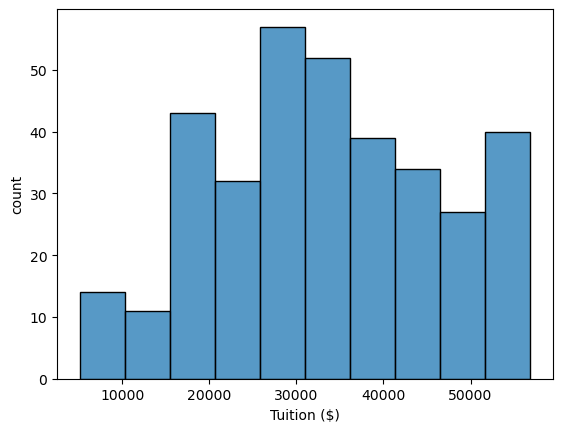

In [5]:
# Tuition Distribution
sns.histplot(data=college_data, x='out_of_state_tuition')
plt.xlabel('Tuition ($)')
plt.ylabel('count');

In [6]:
# Colleges with most and least tuition
college_data[['name','out_of_state_tuition']].sort_values(by='out_of_state_tuition', ascending=True).reset_index(drop=True)

,name,out_of_state_tuition
0,Franklin Pierce College,5112.0
1,North Park College,5220.0
2,Lesley College,5313.0
3,Southwestern Adventist College,6550.0
4,Huntington College,6635.0
...,...,...
344,Colorado College,55470.0
345,Colgate University,55870.0
346,Sarah Lawrence College,55900.0
347,Amherst College,56426.0


In [7]:
# Add new feature
means = college_data.groupby("state")["out_of_state_tuition"].mean().reset_index()
means["out_of_state_tuition"] = means["out_of_state_tuition"].round(2)
means.rename(columns={"out_of_state_tuition":"state_mean"}, inplace=True)
college_data = college_data.merge(means, on="state", how="left")
college_data.head()

,name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Room.Board,Books,PhD,S.F.Ratio,perc.alumni,Expend,Grad.Rate,state,degree_length,out_of_state_tuition,state_mean
0,Alaska Pacific University,1,193,146,55,16,44,249,869,4120,800,76,11.9,2,10922,15,Alaska,4,20830.0,20830.00
1,Albright College,1,1038,839,227,30,63,973,306,4400,300,79,11.3,23,11644,80,Pennsylvania,4,45306.0,40010.93
2,Amherst College,1,4302,992,418,83,96,1593,5,5300,660,93,8.4,63,21424,100,Massachusetts,4,56426.0,42903.71
3,Auburn University-Main Campus,0,7548,6791,3070,25,57,16262,1716,3933,600,85,16.7,18,6642,69,Alabama,4,30524.0,22816.29
4,Augustana College,1,761,725,306,21,58,1337,300,3244,600,66,10.4,30,6871,69,Illinois,4,42135.0,33971.31


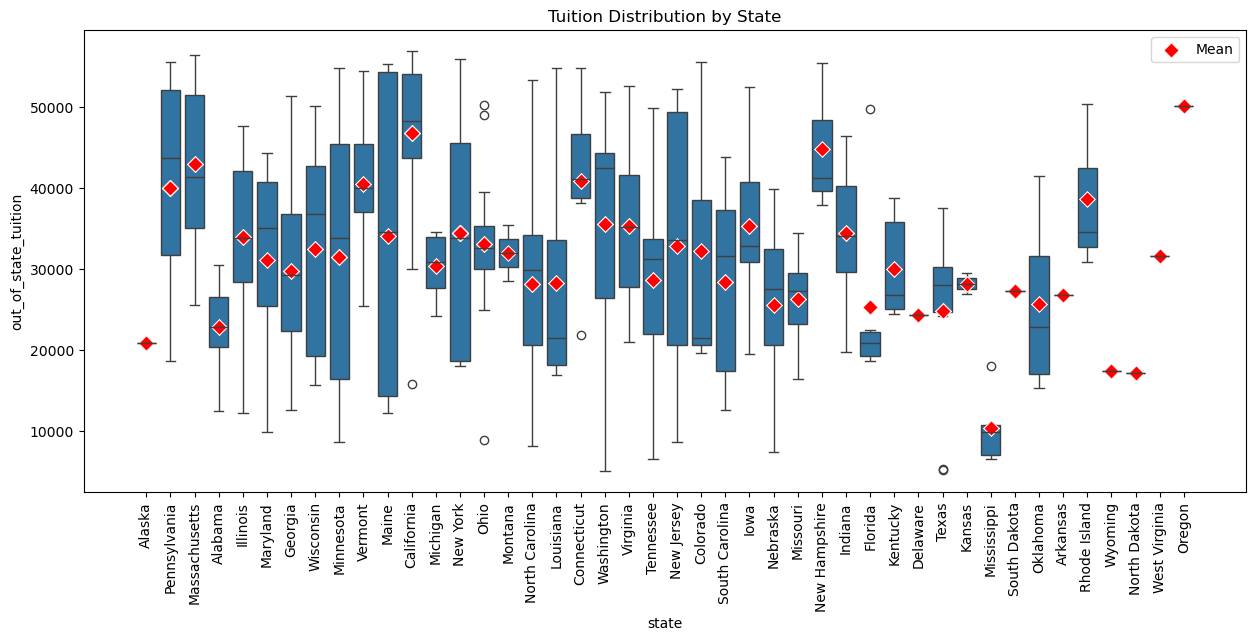

In [8]:
# Plot tuition by state
plt.figure(figsize=(15,6))
sns.boxplot(x="state", y="out_of_state_tuition", data=college_data)
sns.scatterplot(x="state", y="state_mean", data=college_data, color="red", marker="D", zorder=2, s=60, label="Mean")
plt.xticks(rotation=90)
plt.legend()
plt.title("Tuition Distribution by State")
plt.show()

In [9]:
# Remove unnecessary feature
college_data.drop('state', axis=1, inplace=True)
college_data.columns

Index(['name', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Room.Board', 'Books', 'PhD', 'S.F.Ratio',
       'perc.alumni', 'Expend', 'Grad.Rate', 'degree_length',
       'out_of_state_tuition', 'state_mean'],
      dtype='object')

## Feature Analysis

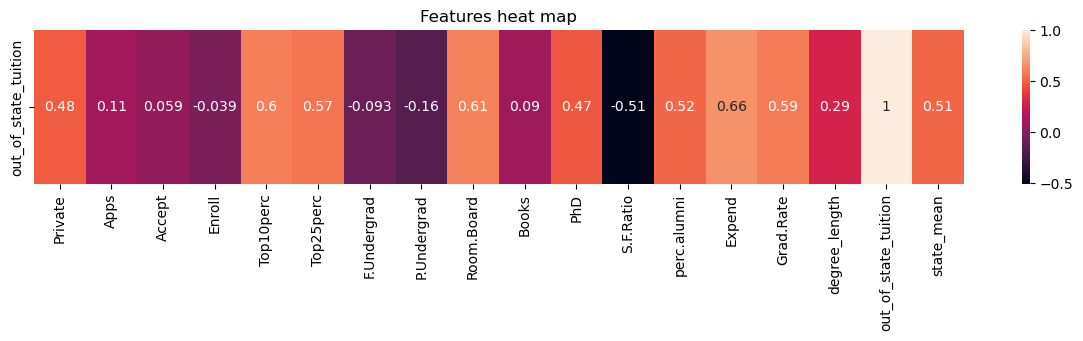

In [10]:
# Features heat map
plt.subplots(figsize=(15,2))
sns.heatmap(college_data.select_dtypes(include='number').corr()[['out_of_state_tuition']].T, annot=True)
plt.title('Features heat map');

When looking at the feature of interest, out_of_state_tuition, it can be seen that the features 
'Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'Books', and 'degree_length' are not significant features
We can remove those rows below.

These are all fairly surprising that there isn't as much correlation.

In [11]:
# Drop low correlation features
college_data.drop(['Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'Books', 'degree_length'], axis=1, inplace=True)
college_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  349 non-null    object 
 1   Private               349 non-null    int64  
 2   Top10perc             349 non-null    int64  
 3   Top25perc             349 non-null    int64  
 4   Room.Board            349 non-null    int64  
 5   PhD                   349 non-null    int64  
 6   S.F.Ratio             349 non-null    float64
 7   perc.alumni           349 non-null    int64  
 8   Expend                349 non-null    int64  
 9   Grad.Rate             349 non-null    int64  
 10  out_of_state_tuition  349 non-null    float64
 11  state_mean            349 non-null    float64
dtypes: float64(3), int64(8), object(1)
memory usage: 32.8+ KB


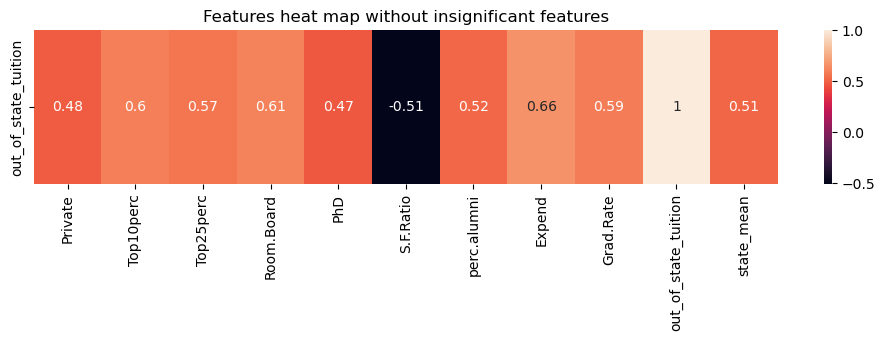

In [12]:
# New heatmap without 'redudant' features
plt.subplots(figsize=(12,2))
sns.heatmap(college_data.select_dtypes(include='number').corr()[['out_of_state_tuition']].T, annot=True)
plt.title('Features heat map without insignificant features');

In [13]:
def scatterplots(columns, ncol, figsize=(15, 8)):
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=(5*ncol, 4*nrow))
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'out_of_state_tuition', data=college_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Tuition')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

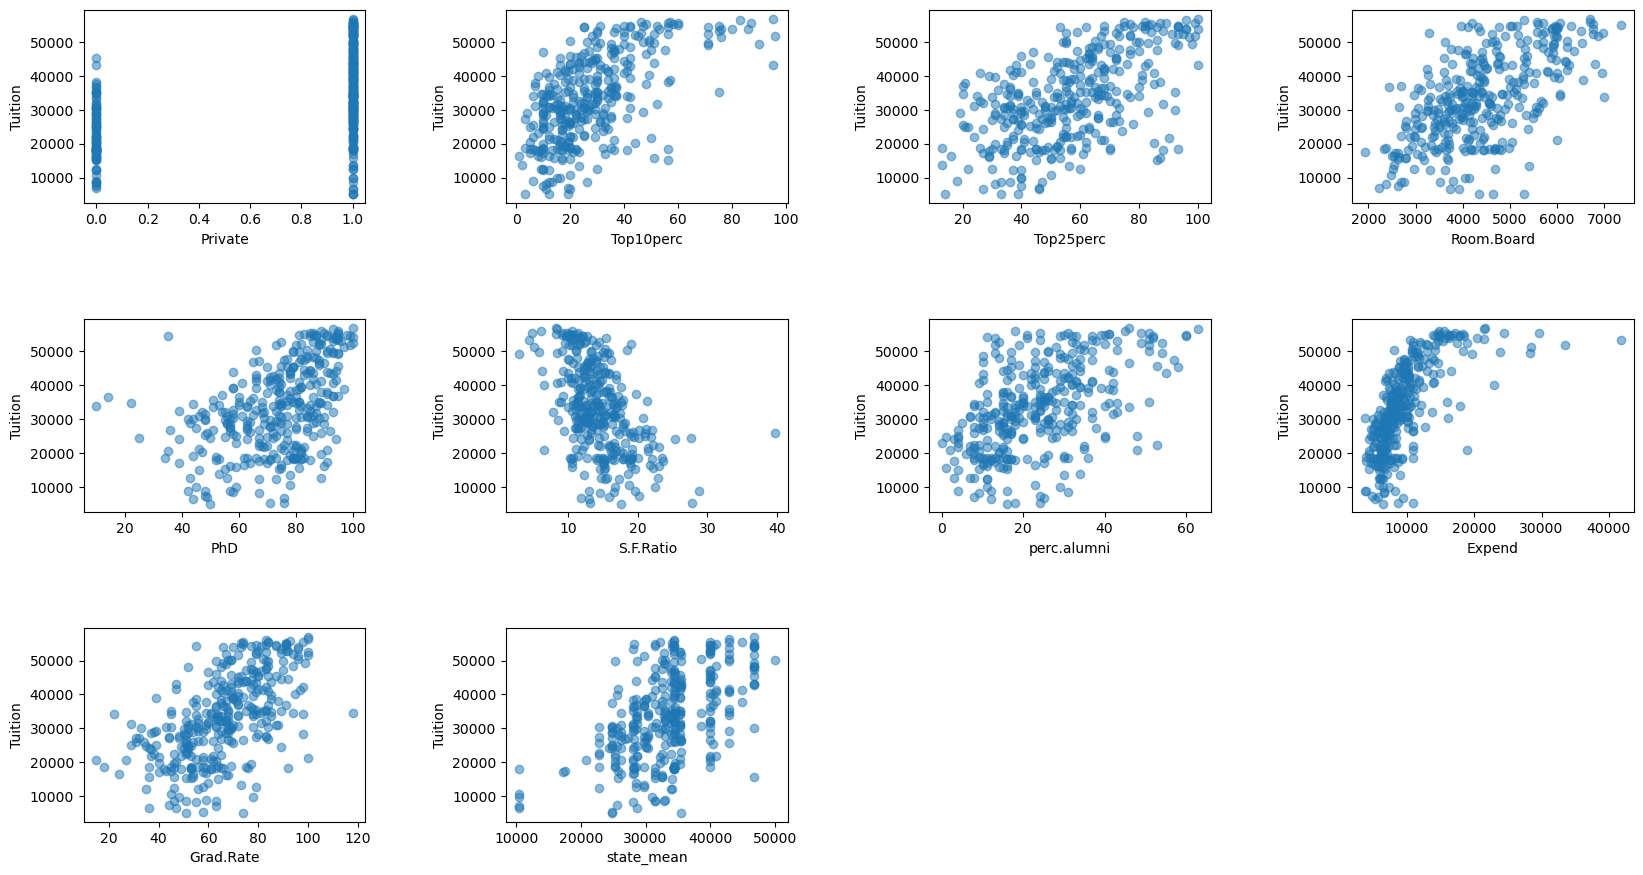

In [14]:
features = college_data.drop(['out_of_state_tuition', 'name'], axis=1)
scatterplots(features, ncol=4, figsize=(15, 15))

There is clear correlation in all features except the Private feature which is due to the nature of a boolean feature.<br><br>
The following is a full description of the features:<br>
<br>
Tuition: Out of state tuition<br>
Private: private of public university (1 signifies private)<br>
Top10perc: Percent new students from top 10% of H.S. class<br>
Top25perc: Percent new students from top 25% of H.S. class<br>
Room.Board: Room and board costs<br>
PhD: Percent of faculty with Ph.D.’s<br>
S.F.Ratio: Student/faculty ratio<br>
perc.alumni: Percent alumni who donate<br>
Expend: Instructional expenditure per student<br>
Grad.Rate: Graduation rate<br>
state_mean: mean tuition of the respective state<br>
<br>

All features correlation seem to make visual and logical sense besides 'Grad.Rate' which has a few concerning values. There is one entry above a 100% graduation which is obviously not valid. The entries at 100% should also be investigated.

In [15]:
# First look at entry above 100% graduation rate
print(college_data.loc[college_data['Grad.Rate'] > 100, ['name', 'Grad.Rate']])

                 name  Grad.Rate
28  Cazenovia College        118


Cazenovia College has their graduation rate set at 118. With a simple google search the graduation rate in 2018 for Cazenovia College is actually 65%.

In [16]:
# Fix Grad.Rate
college_data.loc[college_data.name == 'Cazenovia College', 'Grad.Rate'] = 65
print(college_data[college_data['name'] == 'Cazenovia College'])

                 name  Private  Top10perc  Top25perc  Room.Board  PhD  \
28  Cazenovia College        1          9         35        4840   22   

    S.F.Ratio  perc.alumni  Expend  Grad.Rate  out_of_state_tuition  \
28       14.3           20    7697         65               34630.0   

    state_mean  
28    34395.78  


In [17]:
# Investigating entries at 100% graduation rate
print(college_data[college_data['Grad.Rate'] == 100].name)

2                  Amherst College
40     College of Mount St. Joseph
96             Harvey Mudd College
216         Santa Clara University
294         University of Richmond
Name: name, dtype: object


Using a google search, these values are found to be consistent with a very high graduation rate.

In [18]:
# Statistical elements of features
college_data.describe()

,Private,Top10perc,Top25perc,Room.Board,PhD,S.F.Ratio,perc.alumni,Expend,Grad.Rate,out_of_state_tuition,state_mean
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,0.739255,27.925501,56.478510,4386.613181,73.343840,14.223782,23.601719,9635.544413,66.060172,33328.369628,33328.369456
std,0.439671,17.746301,19.805889,1085.997040,16.078001,4.084500,12.773855,4660.811551,17.166338,12804.964008,6578.470444
min,0.000000,1.000000,13.000000,1920.000000,10.000000,2.900000,0.000000,3733.000000,15.000000,5112.000000,10450.000000
25%,0.000000,16.000000,40.000000,3620.000000,63.000000,11.500000,14.000000,6719.000000,54.000000,24262.000000,28651.890000
50%,1.000000,25.000000,55.000000,4240.000000,76.000000,13.700000,23.000000,8355.000000,66.000000,32730.000000,33971.310000
75%,1.000000,36.000000,70.000000,5140.000000,85.000000,16.300000,32.000000,10872.000000,79.000000,43450.000000,35535.400000
max,1.000000,96.000000,100.000000,7350.000000,100.000000,39.800000,63.000000,41766.000000,100.000000,56876.000000,50074.000000


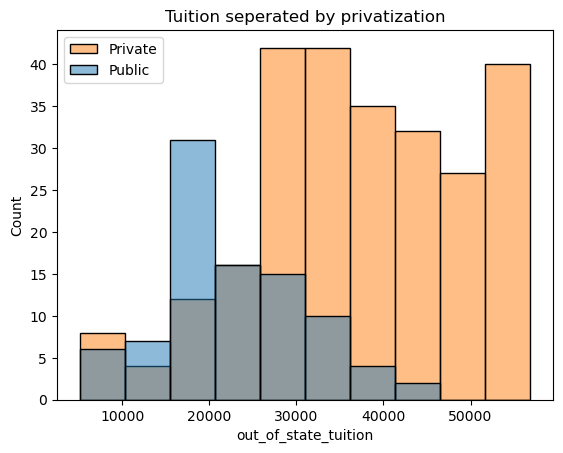

In [19]:
# Distribution of tuition seperated by privatization
sns.histplot(data=college_data, x='out_of_state_tuition', hue='Private')
plt.legend(['Private', 'Public'])
plt.title("Tuition seperated by privatization");

This is a better visualization of the 'Private' feature.

## PCA

In [20]:
college_data_scale = college_data.drop(['name', 'out_of_state_tuition'], axis=1)
college_data_scale_columns = college_data_scale.columns
college_data_scale_index = college_data_scale.index
college_data_scale = scale(college_data_scale)

In [21]:
college_data_scaled_df = pd.DataFrame(college_data_scale, columns=college_data_scale_columns)
college_data_scaled_df.head()

,Private,Top10perc,Top25perc,Room.Board,PhD,S.F.Ratio,perc.alumni,Expend,Grad.Rate,state_mean
0,0.593897,-0.672964,-0.630945,-0.245853,0.165442,-0.569744,-1.693516,0.276412,-2.978706,-1.902618
1,0.593897,0.117065,0.329743,0.012344,0.352300,-0.716852,-0.047173,0.431543,0.813210,1.017281
2,0.593897,3.107891,1.998306,0.842266,1.224305,-1.427872,3.088719,2.532902,1.979954,1.457647
3,-1.683795,-0.165088,0.026368,-0.418293,0.726017,0.607118,-0.439160,-0.643202,0.171501,-1.600246
4,0.593897,-0.390811,0.076930,-1.053643,-0.457419,-0.937513,0.501608,-0.593998,0.171501,0.097874


In [22]:
# Scaling mean check
college_data_scaled_df.mean()

Private        1.017970e-16
Top10perc      1.526954e-17
Top25perc     -7.125787e-17
Room.Board     3.817386e-17
PhD           -2.697619e-16
S.F.Ratio     -1.934142e-16
perc.alumni   -9.161726e-17
Expend         1.628751e-16
Grad.Rate      4.173675e-16
state_mean     6.413208e-16
dtype: float64

In [23]:
# Scaling std check
college_data_scaled_df.std(ddof=1)

Private        1.001436
Top10perc      1.001436
Top25perc      1.001436
Room.Board     1.001436
PhD            1.001436
S.F.Ratio      1.001436
perc.alumni    1.001436
Expend         1.001436
Grad.Rate      1.001436
state_mean     1.001436
dtype: float64

In [24]:
college_pca = PCA().fit(college_data_scale)

Plot the cumulative variance ratio with number of components.

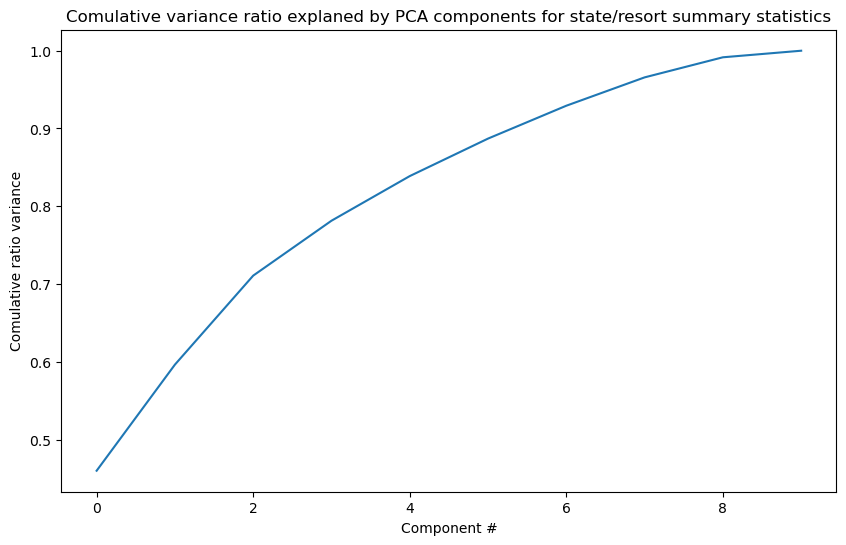

In [25]:
plt.subplots(figsize=(10, 6))
plt.plot(college_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Comulative ratio variance')
plt.title('Comulative variance ratio explaned by PCA components for state/resort summary statistics');

The first two components account for over 60% of the variance and the first six components account for almost 90% of the variance.

In [26]:
college_pca_x = college_pca.transform(college_data_scale)
pca_df = pd.DataFrame({'PC1': college_pca_x[:, 0], 'PC2': college_pca_x[:, 1]})
pca_df.head()

,PC1,PC2
0,-2.074943,-0.182854
1,1.266329,0.483938
2,6.028261,-0.479922
3,-1.215272,-1.935402
4,-0.151448,0.830586


In [27]:
pd.DataFrame(college_pca.components_, columns=college_data_scale_columns)

,Private,Top10perc,Top25perc,Room.Board,PhD,S.F.Ratio,perc.alumni,Expend,Grad.Rate,state_mean
0,0.215157,0.389811,0.365331,0.300353,0.268524,-0.301467,0.308549,0.392796,0.341182,0.221796
1,0.605764,-0.301901,-0.349906,0.206091,-0.483002,-0.243855,0.159992,-0.050362,0.092324,0.218139
2,-0.239027,-0.176159,-0.165340,0.483465,0.220780,0.277201,-0.288951,-0.068784,0.089335,0.654957
3,0.023168,0.013661,0.143422,-0.185626,-0.130201,0.563466,0.435599,-0.349317,0.541096,0.072453
4,-0.358900,-0.297813,-0.336056,-0.320652,0.293146,-0.335045,0.555983,0.045978,-0.028342,0.237744
5,0.262771,-0.257087,-0.264523,0.372164,0.545903,0.229296,0.162932,0.014958,0.034677,-0.527086
6,-0.040920,-0.165633,-0.079724,-0.188424,0.150229,-0.384118,-0.471376,-0.148463,0.702003,-0.147892
7,0.511142,0.018842,0.205321,-0.332613,0.461201,-0.054673,-0.107862,-0.446581,-0.264378,0.298212
8,0.260336,0.067173,-0.316839,-0.457020,0.090778,0.369437,-0.189816,0.636499,0.094624,0.153686
9,-0.022673,0.733892,-0.603645,0.052844,0.038045,-0.058879,0.020914,-0.295764,0.025339,-0.015475


## Summary and Save

In [28]:
college_data.head()

,name,Private,Top10perc,Top25perc,Room.Board,PhD,S.F.Ratio,perc.alumni,Expend,Grad.Rate,out_of_state_tuition,state_mean
0,Alaska Pacific University,1,16,44,4120,76,11.9,2,10922,15,20830.0,20830.00
1,Albright College,1,30,63,4400,79,11.3,23,11644,80,45306.0,40010.93
2,Amherst College,1,83,96,5300,93,8.4,63,21424,100,56426.0,42903.71
3,Auburn University-Main Campus,0,25,57,3933,85,16.7,18,6642,69,30524.0,22816.29
4,Augustana College,1,21,58,3244,66,10.4,30,6871,69,42135.0,33971.31


In [29]:
# Save the data 
save_file(college_data, 'college_data_EDA.csv', '../data')

Writing file.  "../data/college_data_EDA.csv"
